In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten , Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model as M

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings 
warnings.filterwarnings('ignore') 

In [5]:
def moment_complexe(image,p,q):
    n,m = image.shape
    s=0
    for x in range(n):
        for y in range(m):
            s += (x + 1j * y)**p * (x - 1j * y)**q * image[x,y]
    return s

In [6]:
from numpy import exp
p_0 = 2
def invariant_rotation(image,p,q):
    return (moment_complexe(image,p_0 -1 ,p_0) ** (p-q)) * moment_complexe(image,p,q)

In [7]:
import cmath
def invariant_complet(image,p,q): 
    theta = cmath.phase(invariant_rotation(image,1,0))
    gamma = (invariant_rotation(image,0,0)) ** (1/2) 
    return (gamma ** -(p+q+2) )*(exp(-(p-q)*theta*1j))*moment_complexe(image,p,q)

In [8]:
import numpy as np
import cmath

In [9]:
import tensorflow_datasets as tfds 
from tensorflow.keras.datasets import cifar10,fashion_mnist
##(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the selected classes
selected_classes = [0, 1, 2, 3, 4]

# Create masks to filter the data for the selected classes
train_mask = np.isin(y_train, selected_classes).flatten()
test_mask = np.isin(y_test, selected_classes).flatten()

# Filter the data based on the masks
x_train_subset = x_train[train_mask]
y_train_subset = y_train[train_mask]
x_test_subset = x_test[test_mask]
y_test_subset = y_test[test_mask]

# Preprocess the data
x_train_subset = x_train_subset.astype('float32') / 255.0
x_test_subset = x_test_subset.astype('float32') / 255.0

# You should one-hot encode the labels for the selected classes
y_train_subset = to_categorical(y_train_subset, num_classes=len(selected_classes))
y_test_subset = to_categorical(y_test_subset, num_classes=len(selected_classes))


In [ ]:
'''import os
import cv2  # OpenCV for image processing
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define the path to your train and test image directories
train_dir = 'C:/Users/ghass/Downloads/archive (20)/train'
test_dir = 'C:/Users/ghass/Downloads/archive (20)/valid'

# Function to load and preprocess images
def load_and_preprocess_images(image_dir):
    images = []
    labels = []
    
    for label in os.listdir(image_dir):
        label_dir = os.path.join(image_dir, label)
        
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            
            # Preprocess the image (normalize pixel values)
            image = image/ 255.0
            
            # Append the preprocessed image and its label
            images.append(image)
            labels.append(label)  # Assuming labels are represented as directory names
            
    return images, labels

x_train, y_train = load_and_preprocess_images(train_dir)

# Load and preprocess testing data
x_test, y_test = load_and_preprocess_images(test_dir) 

# Create a dictionary to map string labels to integer values
label_to_id = {
    'healthy': 0,
    'powdery_mildew': 1,
    'Tomato_mosaic_virus': 2,
    'Tomato_Yellow_Leaf_Curl_Virus': 3,
    'Spider_mites Two-spotted_spider_mite': 4,
    'Target_Spot': 5,
    'Septoria_leaf_spot': 6,
    'Late_blight': 7,
    'Leaf_Mold': 8,
    'Bacterial_spot': 9,
    'Early_blight': 10
}

# Convert string labels to integer labels using the mapping
y_train = [label_to_id[label] for label in y_train]
y_test = [label_to_id[label] for label in y_test]

# Convert integer labels to one-hot encoding
num_classes = len(label_to_id)
y_train = to_categorical(y_train, num_classes=num_classes, dtype='int')
y_test = to_categorical(y_test, num_classes=num_classes, dtype='int')
'''

In [2]:
'''import os
import pickle
import cv2

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# prepare data
input_dir = 'C:/Users/ghass/Downloads/archive (19)/AugmentedAlzheimerDataset'
categories = ['VeryMildDemented', 'NonDemented','MildDemented','ModerateDemented']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)'''

In [12]:
from tensorflow.keras.applications import DenseNet121,EfficientNetB0,VGG16,MobileNetV2
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
base_model = DenseNet121( include_top=False,
    weights="imagenet",
    input_shape=(32,32,3), 
    pooling=max, 
)
#base_model = Resnet18(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [13]:
import cv2
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import sklearn
from tensorflow.keras.applications import VGG16         
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



# Extract CNN features using a small CNN-based classifier
# Function to convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return grayscale_image

def extract_cnn_features(images):
    # Extract features using the small CNN-based model
    cnn_features = base_model.predict(images) 
    return cnn_features

# Compute moment invariants for each image
def compute_moment_invariants(images):
    moment_invariants_list = []
    for img in images:

        grayscale_image = convert_to_grayscale(img)
        moments_inv = invariant_complet(grayscale_image,2,2)#moments = cv2.moments(grayscale_image)
        
        moment_invariants_complexes = moments_inv.flatten()#moment_invariants = cv2.HuMoments(moments).flatten()
        moment_invariants_list.append(moment_invariants_complexes)
    return np.array(moment_invariants_list)


# Preprocess the CIFAR-10 dataset and obtain 'images' and 'labels'
images = x_train_subset
labels = np.argmax(y_train_subset, axis=1)
#labels = np.argmax(y_train, axis=0)  # Convert one-hot encoded labels to integer labels

# Extract CNN features and moment invariants
cnn_features = extract_cnn_features(images)
moment_invariants = compute_moment_invariants(images)  
num_moment_invariants = moment_invariants.shape[0]
# Reshape cnn_features to (num_moment_invariants, -1), where -1 will infer the remaining dimensions
cnn_features_flattened = cnn_features.reshape(num_moment_invariants, -1)

# Combine features
combined_features = np.concatenate([cnn_features_flattened,moment_invariants], axis=1)  

In [ ]:
#combined_features = np.concatenate((cnn_features_flattened, moments_invariants.real, moments_invariants.imag) ,axis=1)

In [17]:
import numpy as np
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Concatenate, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2)

# Create a new model for classification
classifier = Sequential()
classifier.add(Dense(units=1024, activation='relu')) 
#classifier.add(BatchNormalization())
classifier.add(Dense(units=1024, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dense(units=256, activation='relu')) 
classifier.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001) 
classifier.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = classifier.fit(x_train,
                         y_train,
                         batch_size=64,
                         epochs=30,
                         validation_data=(x_test, y_test)
                         )

# Evaluate the classifier
accuracy = classifier.evaluate(x_test, y_test, verbose=1)[1]
#print("Test Accuracy:", accuracy)
print("Best accuracy:", np.max(history.history["val_accuracy"]))



Epoch 1/30
313/313 [==============================] - 5s 16ms/step - loss: 0.8391 - accuracy: 0.6813 - val_loss: 0.7678 - val_accuracy: 0.7214
Epoch 2/30
313/313 [==============================] - 5s 16ms/step - loss: 0.6873 - accuracy: 0.7420 - val_loss: 0.7601 - val_accuracy: 0.7184
Epoch 3/30
313/313 [==============================] - 5s 16ms/step - loss: 0.6286 - accuracy: 0.7627 - val_loss: 0.7527 - val_accuracy: 0.7222
Epoch 4/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5684 - accuracy: 0.7875 - val_loss: 0.8975 - val_accuracy: 0.6978
Epoch 5/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5223 - accuracy: 0.8045 - val_loss: 0.7082 - val_accuracy: 0.7480
Epoch 6/30
313/313 [==============================] - 5s 16ms/step - loss: 0.4633 - accuracy: 0.8249 - val_loss: 0.7651 - val_accuracy: 0.7422
Epoch 7/30
313/313 [==============================] - 5s 14ms/step - loss: 0.4122 - accuracy: 0.8432 - val_loss: 0.7729 - val_accuracy: 0.7410

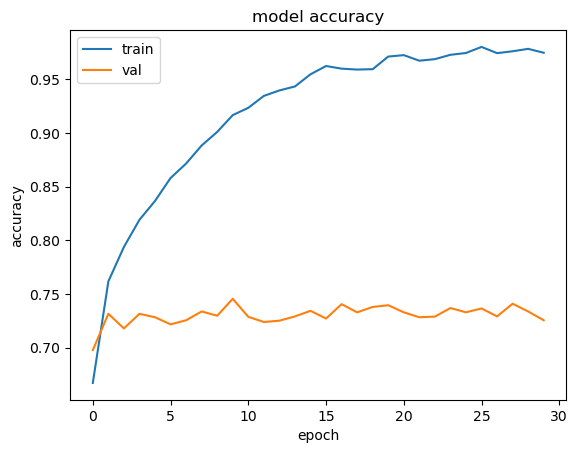

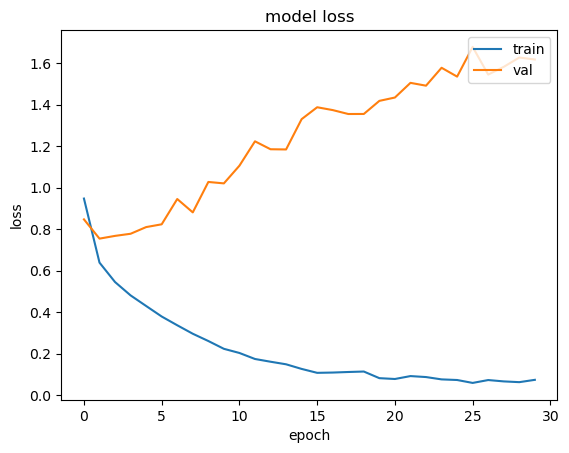

In [15]:
# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
#base_model.save('Downloads/DenseNet_custom_new_new_imag_2,4_6466.h5')

In [ ]:
base_model.summary()